   ## Exploratory Data Analysis of Black Friday Purchase Behaviour
   
   This project analyses a small dataset of Black Friday purchases paierd with demographic data from the customers. Here, I implement statistical and machine learning techniques as well as data visualisation for exploring the dataset. The features given are unable to predict the customer purchase behaviour singlehandedly, which is the reason why this project is solely focused on exploratory data analysis. 
   
   The data has been obtained from the data science website, Analytics Vidhya. 
   
   The code and documentation for all custom functions and classes used can be found in 'BFS_functions_and_classes.py'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from BFS_functions_and_classes import *

plt.style.use('seaborn')
%matplotlib inline

First, we import the data and have a look at its head.

In [2]:
df = pd.read_csv('data.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


Let's check the distribution of our dependent variable, Purchase, which represents the value of every individual purchase made. 

Text(0.5, 1.0, '60 Bins')

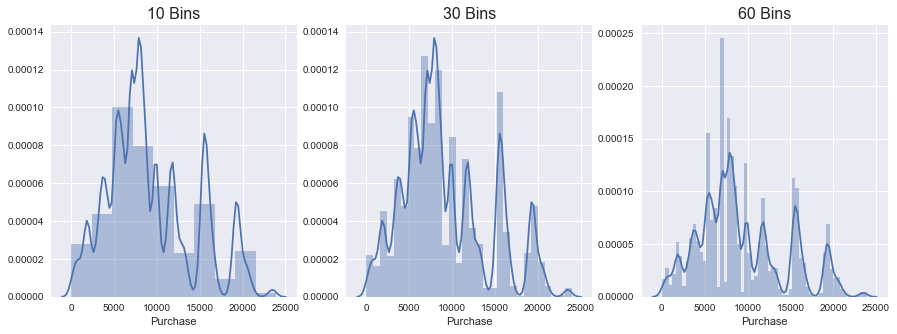

In [3]:
fig, axs = plt.subplots(ncols=3, figsize=(15,5))
sns.distplot(df['Purchase'],bins=10,ax=axs[0])
sns.distplot(df['Purchase'],bins=30,ax=axs[1])
sns.distplot(df['Purchase'],bins=60,ax=axs[2])
axs[0].set_title('10 Bins',fontsize=16)
axs[1].set_title('30 Bins',fontsize=16)
axs[2].set_title('60 Bins',fontsize=16)


The data seems to follow a multimodal distribution, with at least 3 modes which stand up. 

Next, we split the data into the train and test set using train-test split.

In [4]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

Now, we need to compare the distribution of the training data with that of the full data to ensure we got a representative sample out of our split (alternatively, we could have used stratified shuffle split to split the data).

Text(0.5, 1.1, 'Historams of the full and partial datasets')

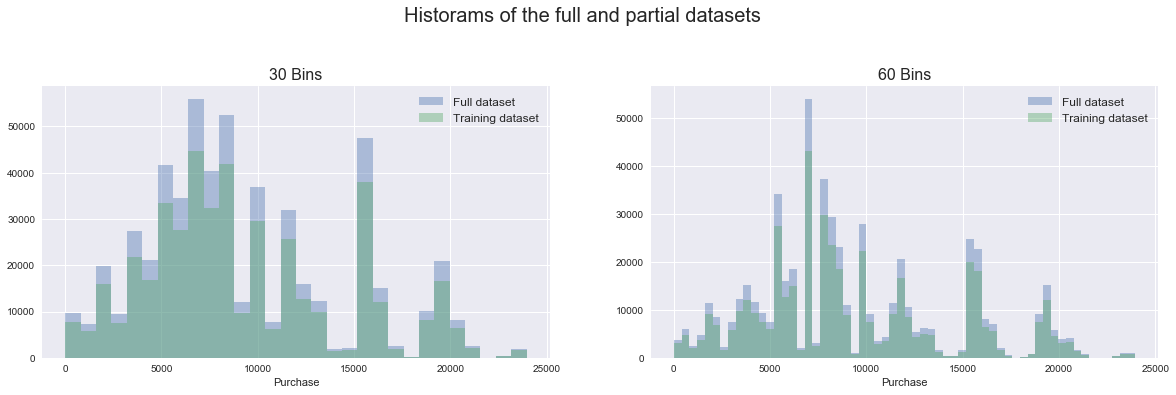

In [5]:
fig, axs = plt.subplots(ncols=2, figsize=(20,5))

sns.distplot(df['Purchase'], bins=30, kde=False, label='Full dataset', ax=axs[0])
sns.distplot(train_set['Purchase'], bins=30, kde=False, label='Training dataset', ax=axs[0])
axs[0].legend(prop={'size': 12})
axs[0].set_xlabel('Purchase')
axs[0].set_title('30 Bins', fontsize=16)

sns.distplot(df['Purchase'], bins=60, kde=False, label='Full dataset', ax=axs[1])
sns.distplot(train_set['Purchase'], bins=60, kde=False, label='Training dataset', ax=axs[1])
axs[1].legend(prop={'size': 12})
axs[1].set_xlabel('Purchase')
axs[1].set_title('60 Bins', fontsize=16)

fig.suptitle('Historams of the full and partial datasets', fontsize=20, y=1.1)

As can be seen, the training data follows the distribution of the full dataset reasonably close, hence it is a good approximation of the full dataset.  

Now, it is time to look at the type of data held in the dataframe as well as which features hold missing values.

In [6]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440054 entries, 178247 to 121958
Data columns (total 12 columns):
User_ID                       440054 non-null int64
Product_ID                    440054 non-null object
Gender                        440054 non-null object
Age                           440054 non-null object
Occupation                    440054 non-null int64
City_Category                 440054 non-null object
Stay_In_Current_City_Years    440054 non-null object
Marital_Status                440054 non-null int64
Product_Category_1            440054 non-null int64
Product_Category_2            301010 non-null float64
Product_Category_3            133226 non-null float64
Purchase                      440054 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 43.6+ MB


Next, since most features in the data set hold discrete values, we will look at the unique values in each of these features. 

In [7]:
df.keys()

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [8]:
for key in df.keys()[2:-1]:
    print(key, " -> ", sorted(df[key].unique()))

Gender  ->  ['F', 'M']
Age  ->  ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
Occupation  ->  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
City_Category  ->  ['A', 'B', 'C']
Stay_In_Current_City_Years  ->  ['0', '1', '2', '3', '4+']
Marital_Status  ->  [0, 1]
Product_Category_1  ->  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Product_Category_2  ->  [nan, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0]
Product_Category_3  ->  [nan, 3.0, 4.0, 5.0, 6.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0]


Now, one clear issue with the current table is that a large number of values repeat multiple times, as the table records every individual product being purchased and the same person can and will normally buy more than one product, hence the repeating user IDs. 

If this data was to be saved in a database, it would require two tables, one for the customers and another for the products, and they would be connected through the user ID as a foreign key. 

We will now create a user/customer dataframe, aggregating all the repeating values using the mode as well as computing the total amount spent by each customer in a new purchase column and also the number of products purchased by each individual customer. We will leave the product categories entirely out of this table for now. 

In [9]:
user_df = train_set.groupby('User_ID')[['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status']].agg(pd.Series.mode)
user_df['Nr_Bought_Products'] = train_set.groupby('User_ID').count()['Purchase']
user_df['Purchase'] = train_set.groupby('User_ID').sum()['Purchase']
user_df['Purchase_mean'] = train_set.groupby('User_ID').mean()['Purchase']
user_df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Nr_Bought_Products,Purchase,Purchase_mean
User_ID,,,,,,,,,
1000001,F,0-17,10,A,2,0,25,245624,9824.960000
1000002,M,55+,16,C,4+,0,60,605458,10090.966667
1000003,M,26-35,15,A,3,0,25,287560,11502.400000
1000004,M,46-50,7,B,2,1,11,155546,14140.545455
1000005,M,26-35,20,A,1,1,93,690259,7422.139785
...,...,...,...,...,...,...,...,...,...
1006036,F,26-35,15,B,4+,1,408,3229575,7915.625000
1006037,F,46-50,1,C,4+,0,100,947933,9479.330000
1006038,F,55+,1,C,2,0,11,76605,6964.090909


It is now time to take a look at the features. Let's start with gender.

In [10]:
mf_prc = get_percentages(user_df,'Gender')

F -> 28.28%
M -> 71.72%


The dataset has significantly more men than women, making it less representative of the general population. We should now check if this male to female proportion is kept constant within the other features, or if there is an interaction effect between gender and other variables. 

The following function will plot a stacked bar plot between any two categorical variables in the user table. 

Let us first see the distribution of gender over the different age groups in the data set.

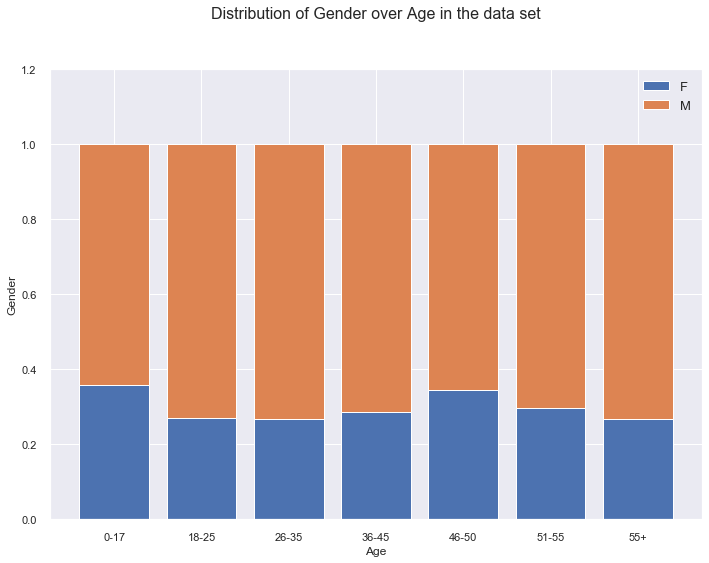

In [11]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
stacked_bar_plot(user_df, 'Age','Gender')

The male to female proportion seems to follow the overall ratio throughout all age groups.

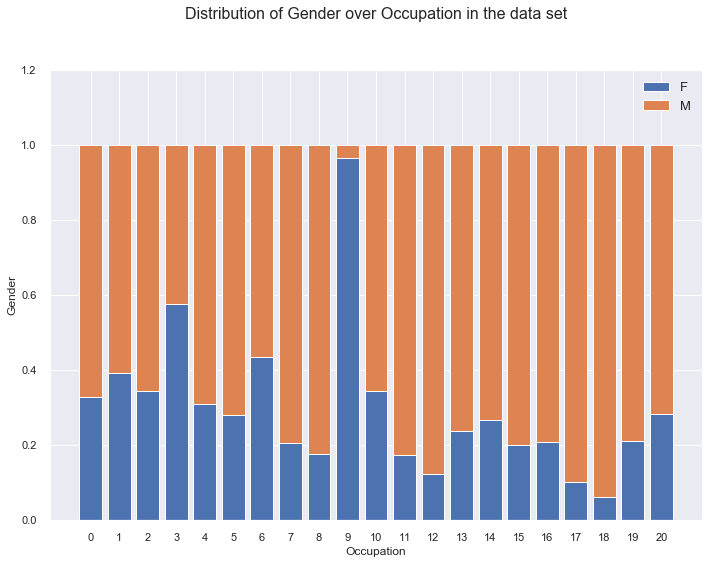

In [12]:
stacked_bar_plot(user_df, 'Occupation', 'Gender')

Unlike in the case of age, there is a clear effect of occupation category on gender. In the current dataset, we only have access to the numbers corresponding to the occupations without knowing the occupations themselves. Regardless, we can see that occupation 9 is completely dominated by women, despite women only making up 25% of the dataset. Similarly, the vast majoriy of people working on occupation 18 are men. This finding would be important to keep in mind when looking for effects of the predictors on the dependent variable as it would require to control for the effect of occupation. 

However, there is one more thing we need to check first.

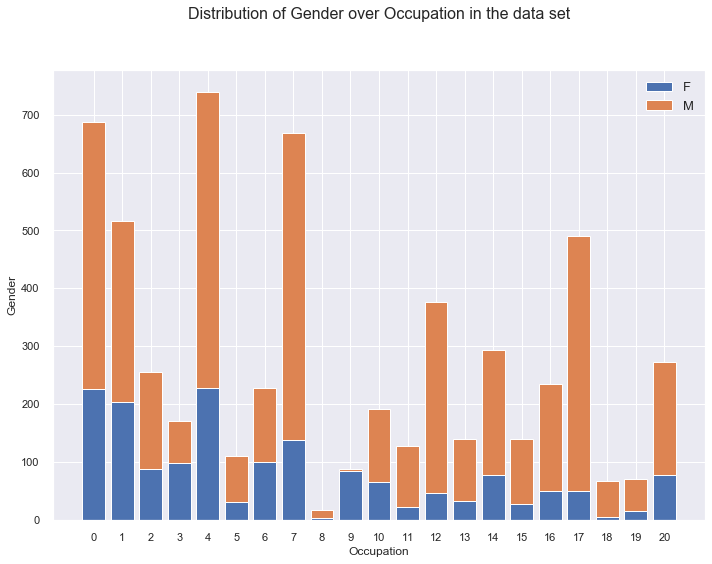

In [13]:
stacked_bar_plot(user_df, 'Occupation', 'Gender', percent=False)

In [14]:
occ_prc = get_percentages(user_df,'Occupation')

0 -> 11.68%
1 -> 8.78%
2 -> 4.35%
3 -> 2.89%
4 -> 12.56%
5 -> 1.88%
6 -> 3.87%
7 -> 11.36%
8 -> 0.29%
9 -> 1.49%
10 -> 3.26%
11 -> 2.17%
12 -> 6.38%
13 -> 2.38%
14 -> 4.99%
15 -> 2.38%
16 -> 3.99%
17 -> 8.33%
18 -> 1.14%
19 -> 1.21%
20 -> 4.63%


As can be seen from the percentages as well as the plot itself, both of the outlier columns account for an extremely small amount of the data (roughly 1% each), making it unlikely the distribution of gender over these ocupations would have any impact on the effect of gender on purchases. 

Next, we can start looking at some of our dependent variables such as the product categories and their relationship with the products. The reason we are looking at the product categories is that, if there is a strong relationship between the kind of products a customer is buying and the amount that customer spends on the products, we could attempt to build a preliminary model which would predict the average product category bought by a customer and then use it as a feature for the final model determining the overall customer spending.   

In [15]:
prod_cat_prc = get_percentages(train_set,'Product_Category_1')

1 -> 25.53%
2 -> 4.35%
3 -> 3.67%
4 -> 2.14%
5 -> 27.41%
6 -> 3.73%
7 -> 0.68%
8 -> 20.71%
9 -> 0.07%
10 -> 0.93%
11 -> 4.41%
12 -> 0.73%
13 -> 1.01%
14 -> 0.28%
15 -> 1.13%
16 -> 1.78%
17 -> 0.11%
18 -> 0.57%
19 -> 0.29%
20 -> 0.47%


There are three categories that stand out: 1, 5 and 8. Together they make up over 73% of the data. 

We can verify if this translates into any individual products being bought at a significantly higher rate than the others. 

In [16]:
percent_prod = round(train_set.groupby('Product_ID').count()['User_ID'].divide(train_set.shape[0]/100),2)
percent_prod = [f"{i}%" for i in percent_prod if i > 0.2]
print(*percent_prod, sep=' ') 

0.21% 0.25% 0.3% 0.22% 0.22% 0.22% 0.21% 0.26% 0.22% 0.27% 0.25% 0.26% 0.22% 0.23% 0.29% 0.23% 0.25% 0.29% 0.21% 0.23% 0.24% 0.26% 0.22% 0.26% 0.24% 0.25% 0.22% 0.21% 0.25% 0.34% 0.21% 0.22%


As can be seen, there is no individual product getting bought at a significantly higher rate than all other products. The highest buying rate for a single product is 0.34%

Now, let's look at the relationship between the main product category and the price of the products in said category.

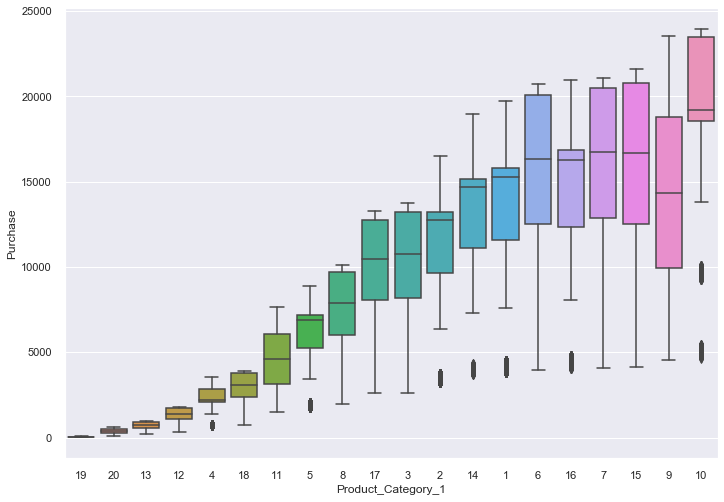

In [17]:
order = train_set.sort_values(by=['Purchase'])['Product_Category_1'].unique()

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(train_set['Product_Category_1'],train_set['Purchase'],order=order)

There is a high level of varience for most categories however, there are clear diferences between them as well. More importantly, categories 5 and 8, which account for around 50% of the data, show significantly less varience compared to others. Unfortunately, these to two categories are also right next to each other in terms of their average product price, meaning they will offer less information regarding the price of products.  

Now, let's look at the second and third product category as well. They both have large amounts of missing values, so we will just put all missing values into their own class.

In [18]:
imputer = SimpleImputer(strategy="constant",fill_value=0.0)

train_set[['Product_Category_2', 'Product_Category_3']] = imputer.fit_transform(
    train_set[['Product_Category_2', 'Product_Category_3']])
train_set[['Product_Category_2', 'Product_Category_3']] = train_set[['Product_Category_2', 'Product_Category_3']].astype(int)

d:\python64\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
d:\python64\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
d:\python64\lib\site-packages\pandas\core\frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

Text(0.5, 1.1, 'Price distribution over the secondary and tertiary product categories')

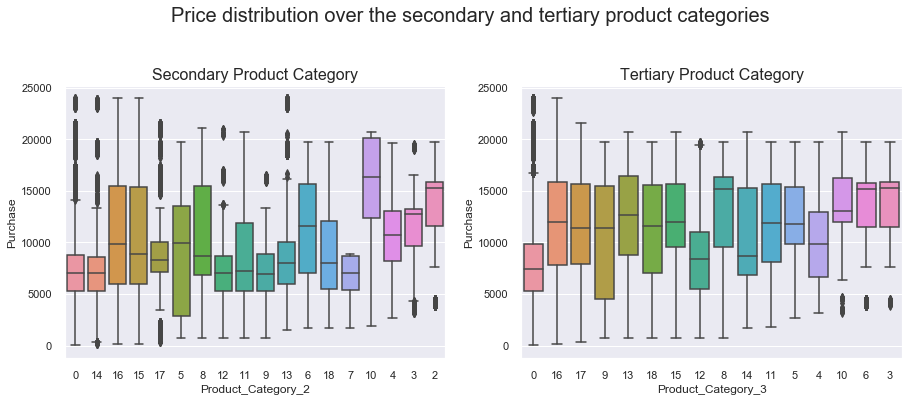

In [19]:
fig, axs = plt.subplots(ncols=2, figsize=(15,5))

order = train_set.sort_values(by=['Purchase'])['Product_Category_2'].unique()
sns.boxplot(train_set['Product_Category_2'],train_set['Purchase'],order=order,ax=axs[0])

order = train_set.sort_values(by=['Purchase'])['Product_Category_3'].unique()
sns.boxplot(train_set['Product_Category_3'],train_set['Purchase'],order=order,ax=axs[1])

axs[0].set_title('Secondary Product Category',fontsize=16)
axs[1].set_title('Tertiary Product Category',fontsize=16)

fig.suptitle('Price distribution over the secondary and tertiary product categories', fontsize=20, y=1.1)

The secondary and tertiary product categories seem to have no relationship with the product price and therefore, will be left out of the analysis. 

Now, getting back to the first product category, we can combine different categories with similar prices in order to have a smaller number of classes. 

In [20]:
train_set['Categ1']=np.nan
#val holds the new value for every product category in order, from 1 to 20. 
val=[5, 4, 4, 1, 2, 6, 6, 3, 6, 6, 2, 1, 1, 5, 6, 6, 4, 1, 1, 1]
for i in train_set['Product_Category_1'].unique():
    train_set['Categ1'].loc[train_set['Product_Category_1']==i]=val[i-1]

d:\python64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
d:\python64\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
d:\python64\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

In [21]:
train_set.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Categ1
178247,1003576,P00233842,M,51-55,7,B,3,1,1,15,0,7800,5.0
196647,1000342,P00139942,M,18-25,12,C,4+,0,5,0,0,8677,2.0
418590,1004386,P00290242,M,26-35,5,B,1,0,8,14,17,7966,3.0
408727,1002931,P00274942,M,18-25,4,B,2,0,8,0,0,9852,3.0
216416,1003434,P00049442,M,18-25,4,B,1,0,1,8,0,15804,5.0


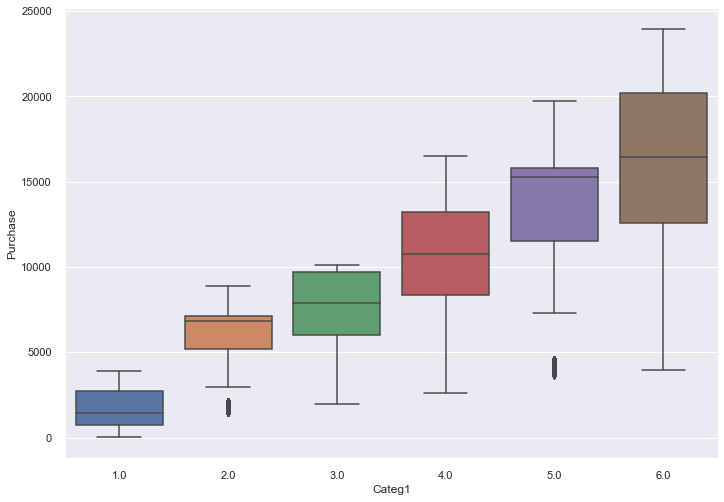

In [22]:
order = train_set.sort_values(by=['Purchase'])['Categ1'].unique()

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(train_set['Categ1'],train_set['Purchase'],order=order)

The new product category column seems to also have a relationship with the price of the individual products. 

Let's see how this translates into the overall customer spending. As the categories are in order from lowest to highest priced, we can treat this feature quantitatively for now.

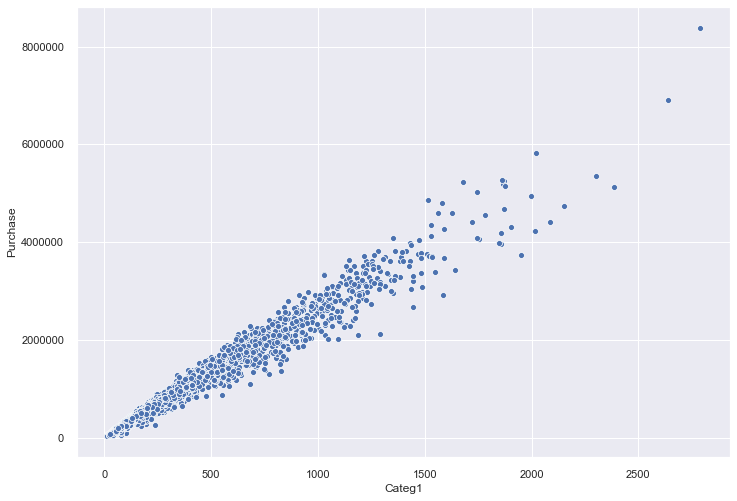

In [23]:
user_categ_count = train_set.groupby('User_ID').sum()['Categ1']

sns.scatterplot(user_categ_count,user_df['Purchase'])

The relationship between the two variables is extremely strong however, this plot does not account for the effect of the amount of products bought, which is embedded in the sum of the individual product categories.

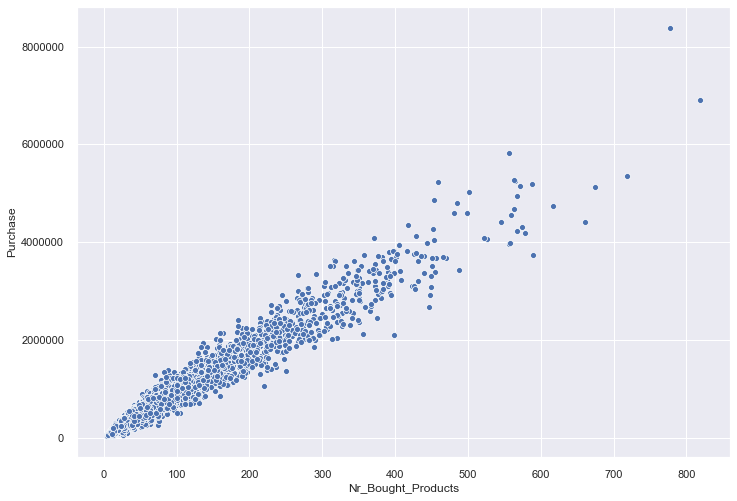

In [24]:
sns.scatterplot(user_df['Nr_Bought_Products'],user_df['Purchase'])

By plotting just the relationship between the number of products and the overall spending, we get a plot that is nearly identical to the previous one.

Text(0.5, 1.0, 'Overall Purchase Value per Customer')

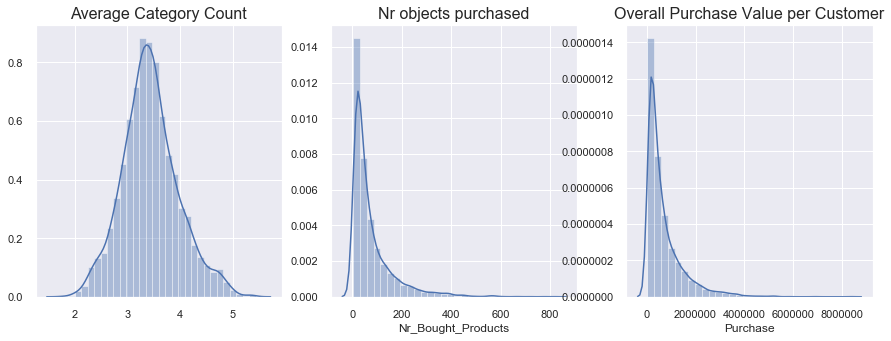

In [25]:
fig, axs = plt.subplots(ncols=3, figsize=(15,5))
sns.distplot(user_categ_count/user_df['Nr_Bought_Products'],bins=30,ax=axs[0])
sns.distplot(user_df['Nr_Bought_Products'],bins=30,ax=axs[1])
sns.distplot(user_df['Purchase'],bins=30,ax=axs[2])
axs[0].set_title('Average Category Count',fontsize=16)
axs[1].set_title('Nr objects purchased',fontsize=16)
axs[2].set_title('Overall Purchase Value per Customer',fontsize=16)

By dividing the category count by the number of products bought, we get a normal distribution for the category, while the other variables have a severily positively skewed, following the exact same distribution. 

Next, we can have a look at the effect of occupation on the overall purchase of a customer. For this, I decided to start by running a chi2 contingency table to analyse if there is a significant difference between between people working in different occupations with respect to spending more or less than the median amount. For this purpuse, we begin by creating a new binary column showing which customers spent more than the median and which spent less. 


In [26]:
purchase_median = user_df['Purchase'].median()
user_df['Purchase_median']='<median'
user_df['Purchase_median'].loc[user_df['Purchase']>=purchase_median]='>=median'
user_df

d:\python64\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Nr_Bought_Products,Purchase,Purchase_mean,Purchase_median
User_ID,,,,,,,,,,
1000001,F,0-17,10,A,2,0,25,245624,9824.960000,<median
1000002,M,55+,16,C,4+,0,60,605458,10090.966667,>=median
1000003,M,26-35,15,A,3,0,25,287560,11502.400000,<median
1000004,M,46-50,7,B,2,1,11,155546,14140.545455,<median
1000005,M,26-35,20,A,1,1,93,690259,7422.139785,>=median
...,...,...,...,...,...,...,...,...,...,...
1006036,F,26-35,15,B,4+,1,408,3229575,7915.625000,>=median
1006037,F,46-50,1,C,4+,0,100,947933,9479.330000,>=median
1006038,F,55+,1,C,2,0,11,76605,6964.090909,<median


Next, we put this information in a crosstab. The crosstab shows the number of customers who spent less and more than the median amount in each occupation.  

In [27]:
cross = pd.crosstab(user_df['Occupation'], user_df['Purchase_median'],colnames=['Purchase Value'])
cross

Purchase Value,<median,>=median
Occupation,,
0,340,348
1,274,243
2,117,139
3,78,92
4,345,395
5,51,60
6,128,100
7,367,302
8,10,7


In [28]:
stats.chi2_contingency(cross)

(72.06621986469702,
 8.346609901924541e-08,
 20,
 array([[343.94160584, 344.05839416],
        [258.4561195 , 258.5438805 ],
        [127.97827194, 128.02172806],
        [ 84.98557121,  85.01442879],
        [369.93719233, 370.06280767],
        [ 55.49057885,  55.50942115],
        [113.98064845, 114.01935155],
        [334.44321847, 334.55678153],
        [  8.49855712,   8.50144288],
        [ 43.99253098,  44.00746902],
        [ 95.98370396,  96.01629604],
        [ 63.98913597,  64.01086403],
        [187.96808691, 188.03191309],
        [ 69.98811747,  70.01188253],
        [146.97504668, 147.02495332],
        [ 69.98811747,  70.01188253],
        [117.48005432, 117.51994568],
        [245.45832626, 245.54167374],
        [ 33.49431336,  33.50568664],
        [ 35.49397386,  35.50602614],
        [136.47682906, 136.52317094]]))

The contingency table has a p value smaller than 0.001, meaning the probability that there is no effect of occupation on purchase is less than 0.1% 

Let's plot this!

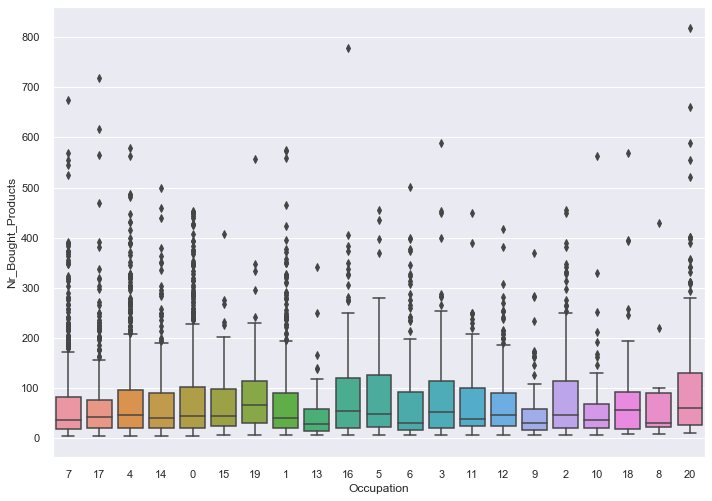

In [29]:
order = user_df.sort_values(by=['Nr_Bought_Products'])['Occupation'].unique()

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(user_df['Occupation'],user_df['Nr_Bought_Products'],order=order)

The relationship between occupations and purchase certainly does not look very strong. 

We can use the stacked bar plot to visualize this relationship in further detail.  

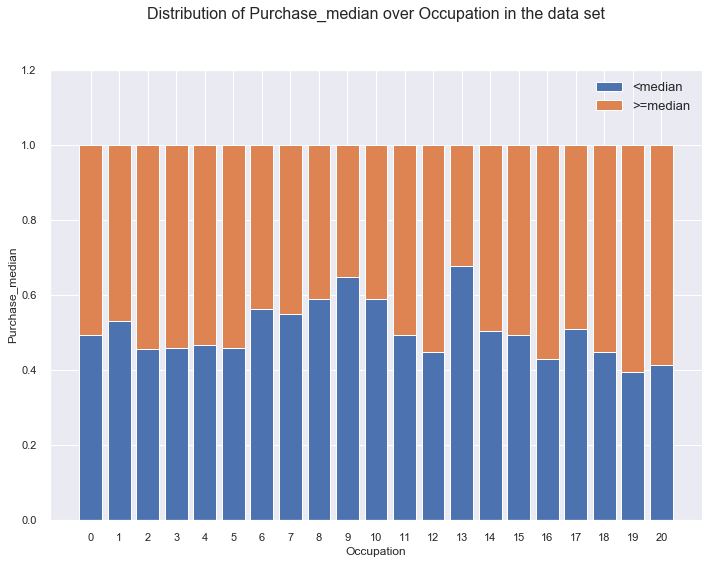

In [30]:
stacked_bar_plot(user_df, 'Occupation', 'Purchase_median')

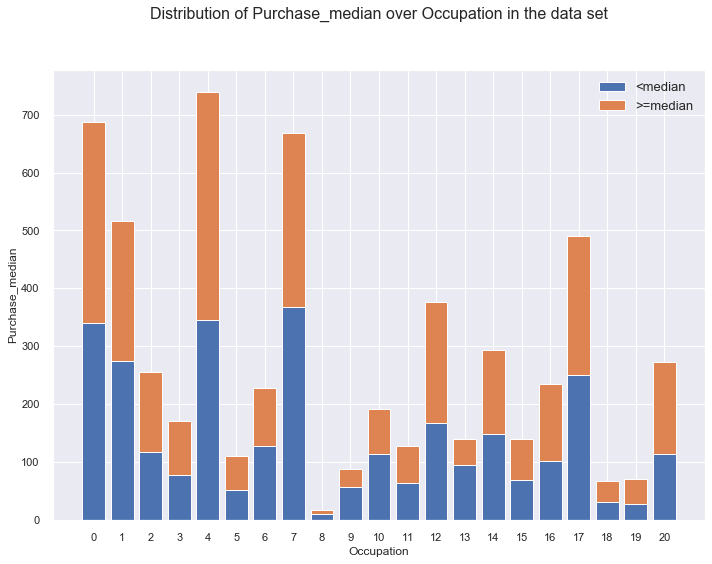

In [31]:
stacked_bar_plot(user_df, 'Occupation', 'Purchase_median', percent=False)

Many of the occupations are equally distributed, we could later get rid of these occupation as they do not provide relevant information about the purchase behaviour. 

For now, we can take a look at the effect of gender on the purchase. Since this is a binary feature, we can simply run an independent samples t-test which will show the effect of gender on the amount spent, rather than the median purchase.

However, before running the t-test we first need to deal with the skew of the purchase variable, as this statistical test assumes the data follows a Gaussian distribution. We will get rid of the skew by applying a logarithmic transformation to the variable.

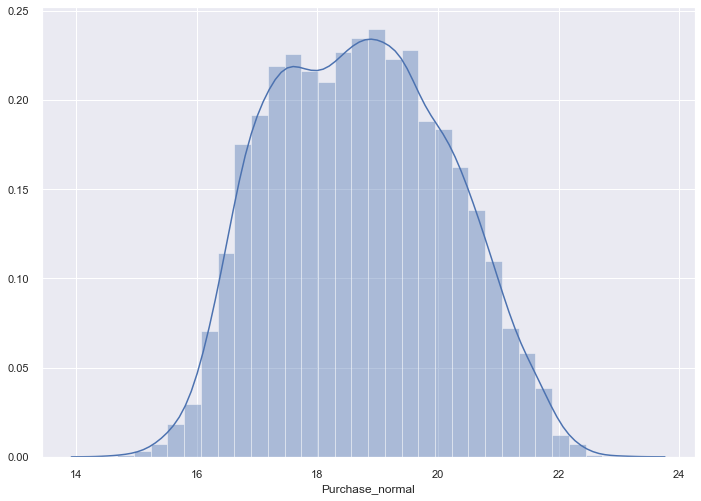

In [32]:
user_df['Purchase_normal'] = user_df['Purchase'].apply(np.log2)

sns.distplot(user_df['Purchase_normal'],bins=30)

Perfect, as we can see, the data has been normalized. Now, onto the t-test! 

In [33]:
male = user_df['Purchase_normal'].loc[user_df['Gender']=='M']
female = user_df['Purchase_normal'].loc[user_df['Gender']=='F']

stats.ttest_ind(male,female)

Ttest_indResult(statistic=9.642916278740374, pvalue=7.633082178896509e-22)

The p value is also smaller than 0.001. Let's see the difference in median spending between the two sexes.

In [34]:
print("Average spending between men: ", round(male.median(),2), "\nAverage spending between women: ",round(female.median(),2))

Average spending between men:  18.82 
Average spending between women:  18.3


Next, we can choose the best categories in the current features and encode them into new binary variables. 

The categories will be chosen using t-tests. We will only keep the categories with a p value smaller than 0.05, meaning the probability that there is no significant effect of these categories on purchase behaviour is less than 5%. 

In [35]:
get_strong_preds(user_df, 'Occupation', print_vals = True)

0   0.339
1   0.189
2   0.258
3   0.226
4   0.154
5   0.133
6   0.023
7   0.063
8   0.457
9   0.001
10   0.0
11   0.621
12   0.206
13   0.0
14   0.544
15   0.55
16   0.047
17   0.443
18   0.92
19   0.073
20   0.0


This example shows the p value of every individual category in the occupation feature. Only categories 6, 9, 10, 13, 16 and 20 will be kept. 

Now, onto the function for encoding and adding the binary variables: encode_best_preds uses the previous function to find the p values associated with the categories, then one hot encodes and adds to the dataframe all categories which satisfy the aforementioned condition. Following the encoding process, the original feature, from which the new variables have been generated, will be droped.   

In [38]:
encode_best_preds(user_df, 'Occupation')
user_df = user_df.drop('Occupation',axis=1)
user_df.head()

,Gender,Age,City_Category,Stay_In_Current_City_Years,Marital_Status,Nr_Bought_Products,Purchase,Purchase_mean,Purchase_median,Purchase_normal,Occupation 6,Occupation 9,Occupation 10,Occupation 13,Occupation 16,Occupation 20
User_ID,,,,,,,,,,,,,,,,
1000001,F,0-17,A,2,0,25,245624,9824.960000,<median,17.906092,0.0,0.0,1.0,0.0,0.0,0.0
1000002,M,55+,C,4+,0,60,605458,10090.966667,>=median,19.207667,0.0,0.0,0.0,0.0,1.0,0.0
1000003,M,26-35,A,3,0,25,287560,11502.400000,<median,18.133503,0.0,0.0,0.0,0.0,0.0,0.0
1000004,M,46-50,B,2,1,11,155546,14140.545455,<median,17.246982,0.0,0.0,0.0,0.0,0.0,0.0
1000005,M,26-35,A,1,1,93,690259,7422.139785,>=median,19.396778,0.0,0.0,0.0,0.0,0.0,1.0


As can be seen, the function has succesfully encoded the occupations with the satisfactory p values. Now, we can repeat the process for the rest of the categorical features. Let's look at age next.

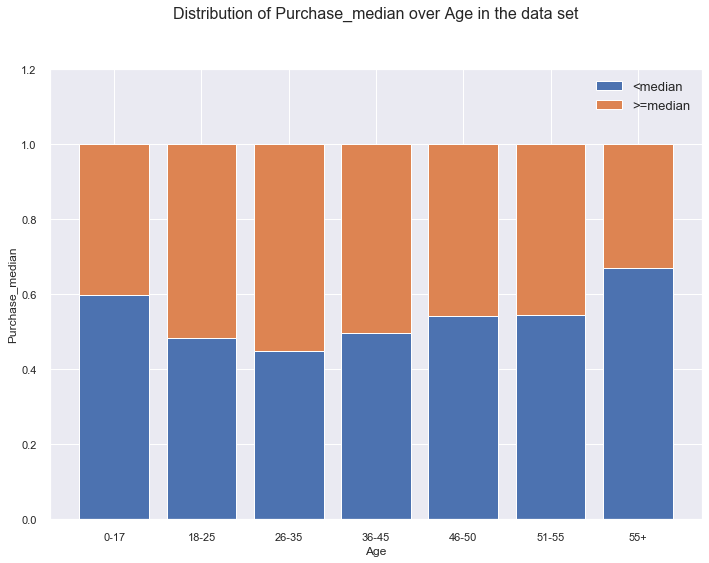

In [39]:
stacked_bar_plot(user_df, 'Age', 'Purchase_median')

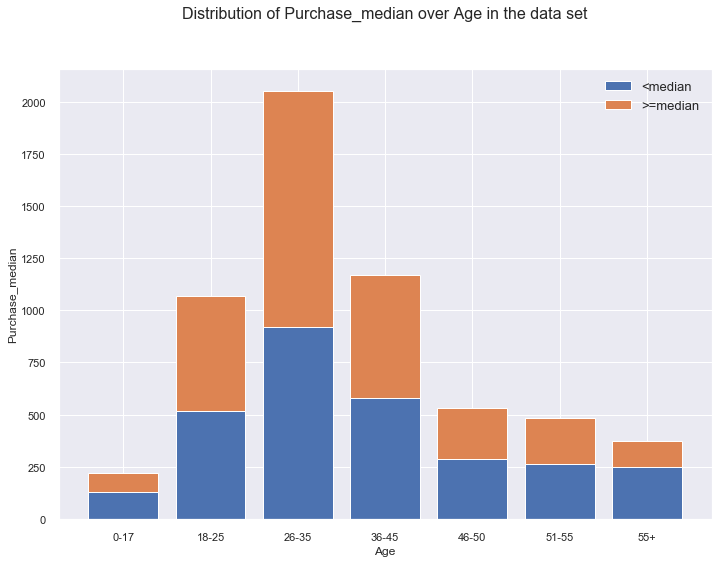

In [40]:
stacked_bar_plot(user_df, 'Age', 'Purchase_median' ,percent=False)

In [41]:
encode_best_preds(user_df, 'Age')
user_df = user_df.drop('Age',axis=1)
user_df.head()

,Gender,City_Category,Stay_In_Current_City_Years,Marital_Status,Nr_Bought_Products,Purchase,Purchase_mean,Purchase_median,Purchase_normal,Occupation 6,Occupation 9,Occupation 10,Occupation 13,Occupation 16,Occupation 20,Age 0-17,Age 26-35,Age 46-50,Age 51-55,Age 55+
User_ID,,,,,,,,,,,,,,,,,,,,
1000001,F,A,2,0,25,245624,9824.960000,<median,17.906092,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1000002,M,C,4+,0,60,605458,10090.966667,>=median,19.207667,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1000003,M,A,3,0,25,287560,11502.400000,<median,18.133503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1000004,M,B,2,1,11,155546,14140.545455,<median,17.246982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1000005,M,A,1,1,93,690259,7422.139785,>=median,19.396778,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


All but one age category have been kept. Next we'll look at City Category.

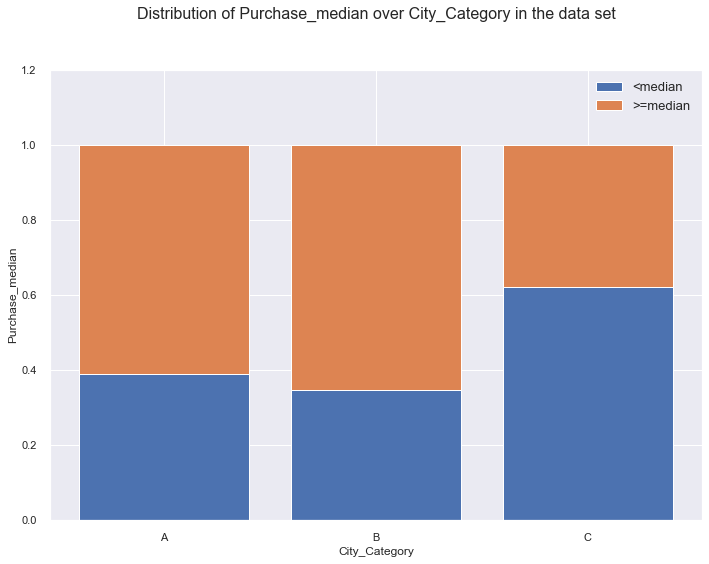

In [42]:
stacked_bar_plot(user_df, 'City_Category', 'Purchase_median')

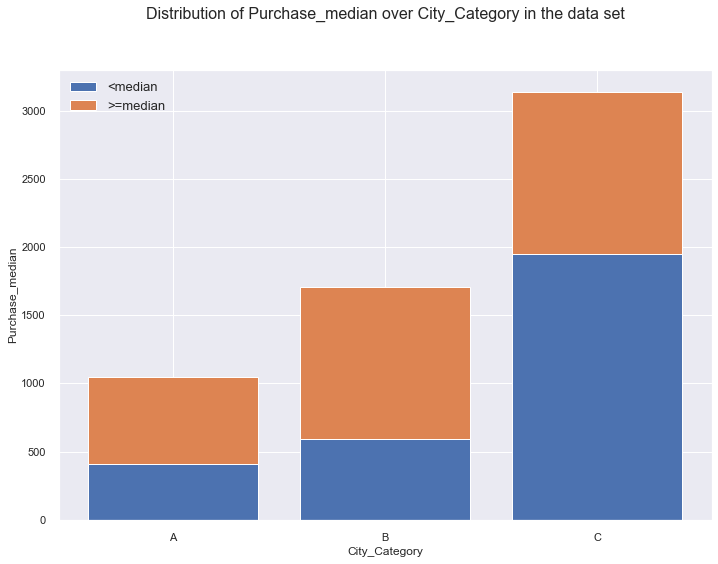

In [43]:
stacked_bar_plot(user_df, 'City_Category', 'Purchase_median', percent=False)

In [44]:
get_strong_preds(user_df, 'City_Category', print_vals = True)

A   0.0
B   0.0
C   0.0


In [45]:
encode_best_preds(user_df,'City_Category')
user_df = user_df.drop('City_Category',axis=1)
user_df.head()

,Gender,Stay_In_Current_City_Years,Marital_Status,Nr_Bought_Products,Purchase,Purchase_mean,Purchase_median,Purchase_normal,Occupation 6,Occupation 9,...,Occupation 16,Occupation 20,Age 0-17,Age 26-35,Age 46-50,Age 51-55,Age 55+,City_Category A,City_Category B,City_Category C
User_ID,,,,,,,,,,,,,,,,,,,,,
1000001,F,2,0,25,245624,9824.960000,<median,17.906092,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1000002,M,4+,0,60,605458,10090.966667,>=median,19.207667,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1000003,M,3,0,25,287560,11502.400000,<median,18.133503,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1000004,M,2,1,11,155546,14140.545455,<median,17.246982,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1000005,M,1,1,93,690259,7422.139785,>=median,19.396778,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


As all three city categories have a significant effect on purchase behaviour, the function encoded all three categories. However, we do not want to keep all three categories, as one of them would be redundant. If an individual client is neither in city category A nor in city category B, they must be in city category C. As a result, City Category C will be removed in order to decrease the amount of redundant information in the dataset.

In [46]:
encode_best_preds(user_df,'Stay_In_Current_City_Years')
user_df = user_df.drop(['City_Category C','Stay_In_Current_City_Years'],axis=1)
user_df.head()

,Gender,Marital_Status,Nr_Bought_Products,Purchase,Purchase_mean,Purchase_median,Purchase_normal,Occupation 6,Occupation 9,Occupation 10,Occupation 13,Occupation 16,Occupation 20,Age 0-17,Age 26-35,Age 46-50,Age 51-55,Age 55+,City_Category A,City_Category B
User_ID,,,,,,,,,,,,,,,,,,,,
1000001,F,0,25,245624,9824.960000,<median,17.906092,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1000002,M,0,60,605458,10090.966667,>=median,19.207667,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1000003,M,0,25,287560,11502.400000,<median,18.133503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1000004,M,1,11,155546,14140.545455,<median,17.246982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1000005,M,1,93,690259,7422.139785,>=median,19.396778,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


We have dropped City Category C and also applied the encoding function on the feature representing the number of years the user has lived in their city. None of the categories have been encoded, meaning none of them has a significant effect on purchase. 

In [47]:
get_strong_preds(user_df, 'Marital_Status', print_vals = True)

0   0.09
1   0.09


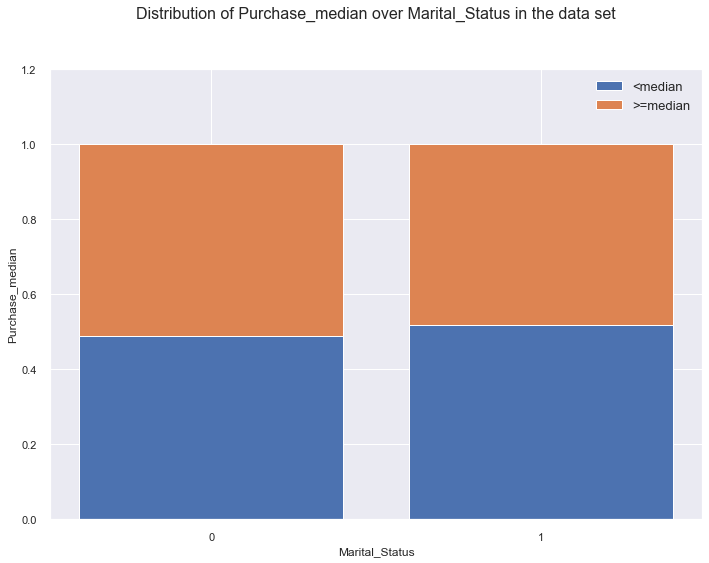

In [48]:
stacked_bar_plot(user_df, 'Marital_Status', 'Purchase_median', percent=True)

Marital status also fails to reach the 5% threshold however, I decided to keep this variable as its p value was not terribly small either and it is also quite reasonable to believe marrital status could have some effect on purchase behaviour. 

Now, it is time to label encode the gender variable. 

In [49]:
from sklearn.preprocessing import LabelEncoder
gender_encoder = LabelEncoder()

user_df['Gender'] = gender_encoder.fit_transform(user_df['Gender'])
user_df.head()

,Gender,Marital_Status,Nr_Bought_Products,Purchase,Purchase_mean,Purchase_median,Purchase_normal,Occupation 6,Occupation 9,Occupation 10,Occupation 13,Occupation 16,Occupation 20,Age 0-17,Age 26-35,Age 46-50,Age 51-55,Age 55+,City_Category A,City_Category B
User_ID,,,,,,,,,,,,,,,,,,,,
1000001,0,0,25,245624,9824.960000,<median,17.906092,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1000002,1,0,60,605458,10090.966667,>=median,19.207667,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1000003,1,0,25,287560,11502.400000,<median,18.133503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1000004,1,1,11,155546,14140.545455,<median,17.246982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1000005,1,1,93,690259,7422.139785,>=median,19.396778,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


Finally, now that the data set is clean, what we need to do is build a pipeline for quickly getting the data into this form from its original one. For this purpose I have built two transformer classes which can be used in a Pipeline. The code can be run from the following line without running anything else and the final data frame will be reached. 




   ## Data Pipeline

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from BFS_functions_and_classes import *
from sklearn.pipeline import Pipeline

In [52]:
df = pd.read_csv('data.csv')

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

y_train = train_set.groupby('User_ID').sum()['Purchase']
y_train_norm = y_train.apply(np.log2)

The GroupByCustomer class groups the raw data based on the user ID and applies the label encoder on the gender variable while AttributesAdder choses the variables based on t-tests performs the one hot encoding. This class also ensures that if all categories in a feature have a significant effect on the target, one of them will be droped as to not create redundancy. 

In [53]:
data_pipeline = Pipeline([('group_by_customer', GroupByCustomer()),
                         ('feature_selector', AttributesAdder(y_train_norm))
                         ])

X_train = data_pipeline.fit_transform(train_set)
X_train.head()

,Gender,Marital_Status,Occupation 6,Occupation 9,Occupation 10,Occupation 13,Occupation 16,Occupation 20,Age 0-17,Age 26-35,Age 46-50,Age 51-55,Age 55+,City_Category A,City_Category B
User_ID,,,,,,,,,,,,,,,
1000001,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1000002,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1000003,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1000004,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1000005,1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


   ## Data analysis aqnd purchase prediction using Machine Learning

In [54]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [55]:
from sklearn.metrics import mean_squared_error

sales_predictions = tree_reg.predict(X_train)
tree_mse = mean_squared_error(y_train, sales_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

666763.3090533536

As can be seen, the model prediction error is extremely high even relative to the scale of the data, despite the complete lack of regularization, showing that the model is incapable of fitting this data from the features it has access to. This was expected, as there are many variables that would have a great impact on purchase behaviour that have not been accounted for, such as the address of the clients relative to the shop or whether they drive or not. 

We can now tune the model and use it to analyse the importance of the features. 

In [56]:
from sklearn.model_selection import RandomizedSearchCV

# Number of features to consider at every split
max_features = [int(x) for x in np.linspace(1, 15, num = 15)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 11, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = list(range(10,100,10))
# Minimum number of samples required at each leaf node
min_samples_leaf = list(range(2,103,5))
# Maximum number of leaf nodes
max_leaf_nodes = list(range(10,41))
# Create the random grid
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }
print(random_grid)

{'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, None], 'min_samples_split': [10, 20, 30, 40, 50, 60, 70, 80, 90], 'min_samples_leaf': [2, 7, 12, 17, 22, 27, 32, 37, 42, 47, 52, 57, 62, 67, 72, 77, 82, 87, 92, 97, 102]}


In [57]:
random_search = RandomizedSearchCV(estimator = DecisionTreeRegressor(), param_distributions = random_grid,
                               n_iter = 20, cv = 5, verbose=2, random_state=42, n_jobs = -1)
random_search.fit(X_train, y_train)
final_tree = random_search.best_estimator_

final_tree.fit(X_train, y_train)
sales_predictions = final_tree.predict(X_train)
tree_mse = mean_squared_error(y_train, sales_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   17.7s finished


690854.6091161979

In [58]:
final_tree

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=15, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=72, min_samples_split=80,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [60]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(final_tree, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
print(tree_rmse_scores.mean())

692661.0890721639


As expected, the model is still showing a poor predictive performace. We can still use it to generate a tree.

In [61]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydotplus

dot_data = StringIO()
export_graphviz(
        final_tree, 
        out_file=dot_data,   
        feature_names=X_train.keys(),
        rounded=True,
        filled=True
    )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf('BF_sales.pdf')

d:\python64\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


True

Now, let's look at the feature importances.

In [62]:
sorted(zip(final_tree.feature_importances_, X_train.keys()), reverse=True)

[(0.48568334838953614, 'City_Category A'),
 (0.38701082841476, 'City_Category B'),
 (0.08828387249902479, 'Gender'),
 (0.034911761896732355, 'Age 26-35'),
 (0.003181978019900074, 'Age 46-50'),
 (0.0009282107800466919, 'Marital_Status'),
 (0.0, 'Occupation 9'),
 (0.0, 'Occupation 6'),
 (0.0, 'Occupation 20'),
 (0.0, 'Occupation 16'),
 (0.0, 'Occupation 13'),
 (0.0, 'Occupation 10'),
 (0.0, 'Age 55+'),
 (0.0, 'Age 51-55'),
 (0.0, 'Age 0-17')]

As can be seen in both the values above and the generated PDF,  the City Categories are by far the best predictors of overall purchase. This is likely not only due to differences in spending behaviour between people living in small and large cities but rather because these categories also contain information about whether or not the individuals live in the same city as the shop they have bought from. If the shop is in a City of category A then it follows that none of the people who live in a city of category B or C are living in the same city as the shop.  